# Census Income

### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
## Importing Neccessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing the Dataset
df = pd.read_csv('census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [3]:
df.shape

(32560, 15)

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- The Given Data contains 32560 rows and 15 columns
- There are 6 Numerical features and 9 Categorical features
- The Output/Dependent feature is Income where we we have to see whether salary is above 50k or not which makes it a classification problem.

### Exploratory Data Analysis (EDA)

- Seperating the Categorical and Numerical features for further Analysis

In [6]:
Numericals_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [7]:
Numericals_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [8]:
Categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [9]:
df.describe().T

count           mean            std      min       25%  \
Age             32560.0      38.581634      13.640642     17.0      28.0   
Fnlwgt          32560.0  189781.814373  105549.764924  12285.0  117831.5   
Education_num   32560.0      10.080590       2.572709      1.0       9.0   
Capital_gain    32560.0    1077.615172    7385.402999      0.0       0.0   
Capital_loss    32560.0      87.306511     402.966116      0.0       0.0   
Hours_per_week  32560.0      40.437469      12.347618      1.0      40.0   

                     50%       75%        max  
Age                 37.0      48.0       90.0  
Fnlwgt          178363.0  237054.5  1484705.0  
Education_num       10.0      12.0       16.0  
Capital_gain         0.0       0.0    99999.0  
Capital_loss         0.0       0.0     4356.0  
Hours_per_week      40.0      45.0       99.0

- "Capital_gain" and "Capital_loss" that have the value 0.0 for minimum value, 25% percentile, 50% percentile and 75% percentile

- Checking for Missing Values

In [10]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- There are no NULL Values in the Dataset

In [11]:
df.duplicated().any()

True

- There seems to be Duplicate Values in the Dataset

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(32536, 15)

In [14]:
df.nunique().to_frame("Unique Values")

Unique Values
Age                        73
Workclass                   9
Fnlwgt                  21647
Education                  16
Education_num              16
Marital_status              7
Occupation                 15
Relationship                6
Race                        5
Sex                         2
Capital_gain              119
Capital_loss               92
Hours_per_week             94
Native_country             42
Income                      2

In [15]:
Unique_features = []
for col in df.columns:
    if len(df[col].value_counts()) < 45:
        Unique_features.append(col)
        print(col)
        print(df[col].value_counts())
        print("*" * 50)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**************************************************
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
**************************************************
Education_num
9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
N

In [16]:
Unique_features

['Workclass',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

- While Analysing the above values we can see "?" in the columns "Workclass", "Occupation" and "Native_country" which we have to replace with name that makes sense.

In [17]:
df['Workclass'].replace({' ?':' Other-Working-Class'},inplace=True)
df['Occupation'].replace({' ?':' Other-Occupation'},inplace=True)
df['Native_country'].replace({' ?':' Other-Countries'},inplace=True)

- We have replaced '?' with something meaningful

### Data Visualisation

In [18]:
Numericals_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [19]:
Categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

#### For Visualisation we will plot countplot of Categorical features

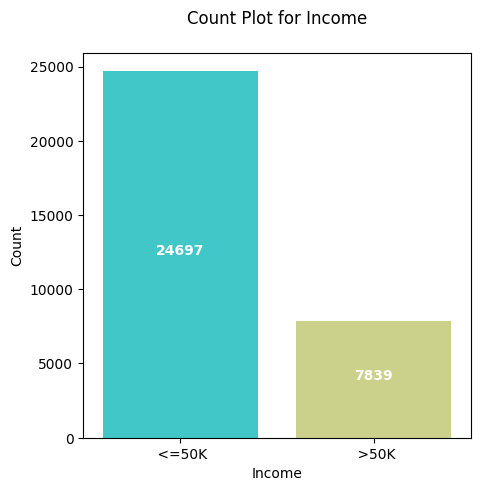

In [20]:
plt.figure(figsize=(5,5))
col_name = 'Income'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="rainbow")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('Count')
plt.show()

- From the countplot of our Output Feature we can see that the Dataset is Highly Imbalanced which we will treat using Oversampling.

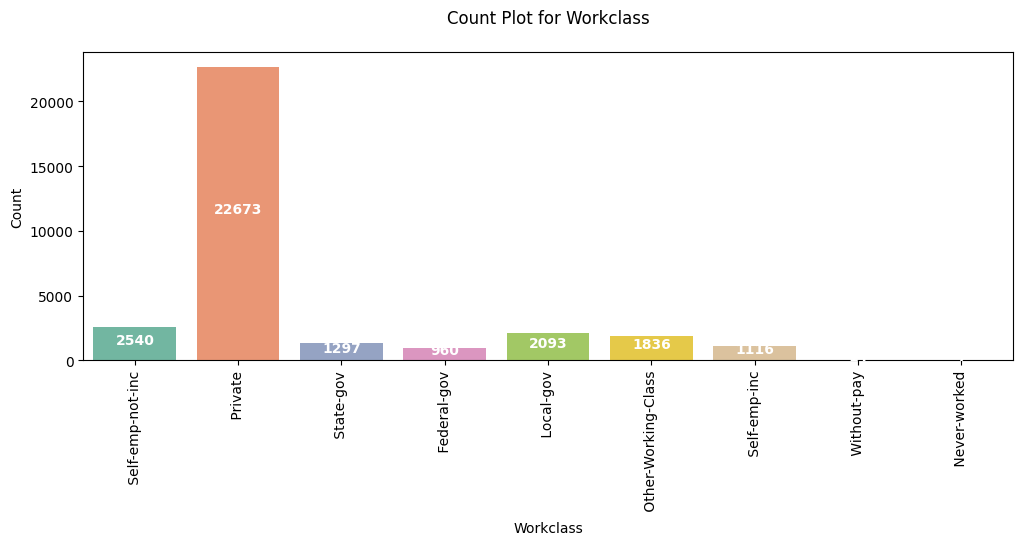

In [21]:
plt.figure(figsize=(12,4))
col_name = 'Workclass'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Set2")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


- The Workclass has highest number of people working in Private sector 
- The Number of Unemployed people is almost negligible

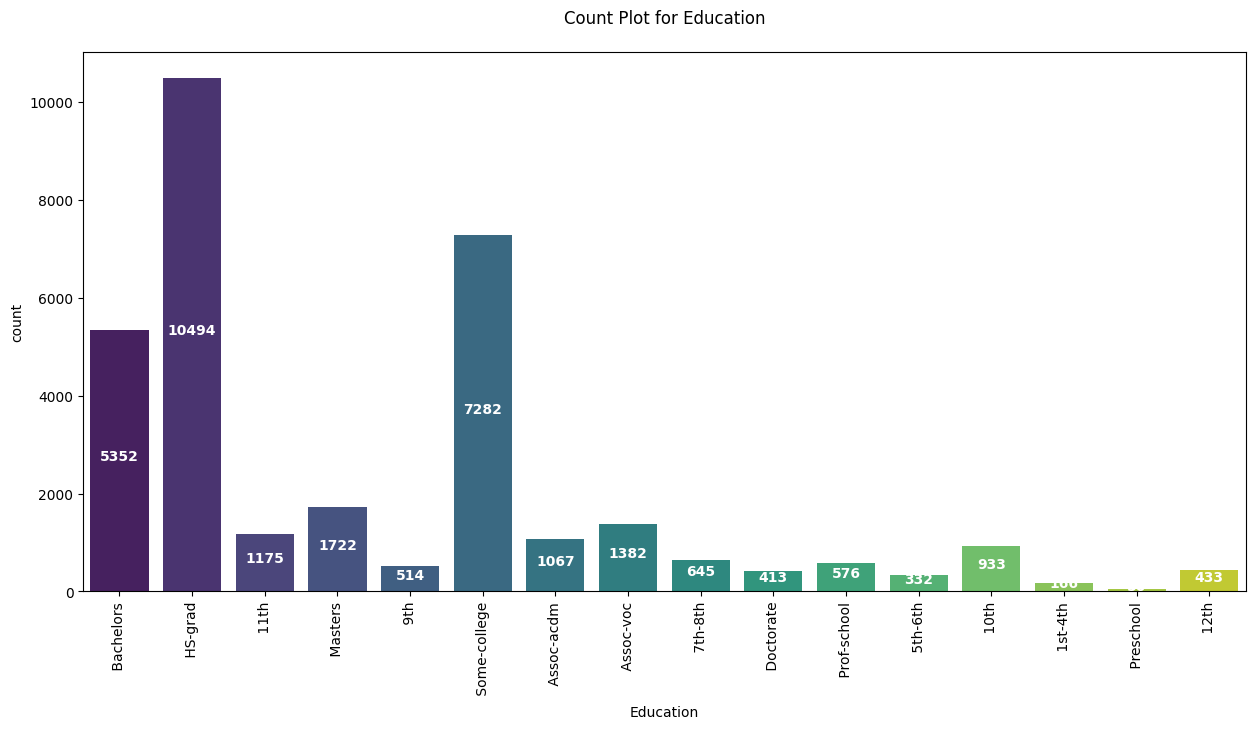

In [22]:
plt.figure(figsize=(15,7))
col_name = 'Education'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="viridis")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


- Education column has the highest number of values in HS grad followed by Some-college and Bachelors
- The loweest number is for preschool and 1st-4th.

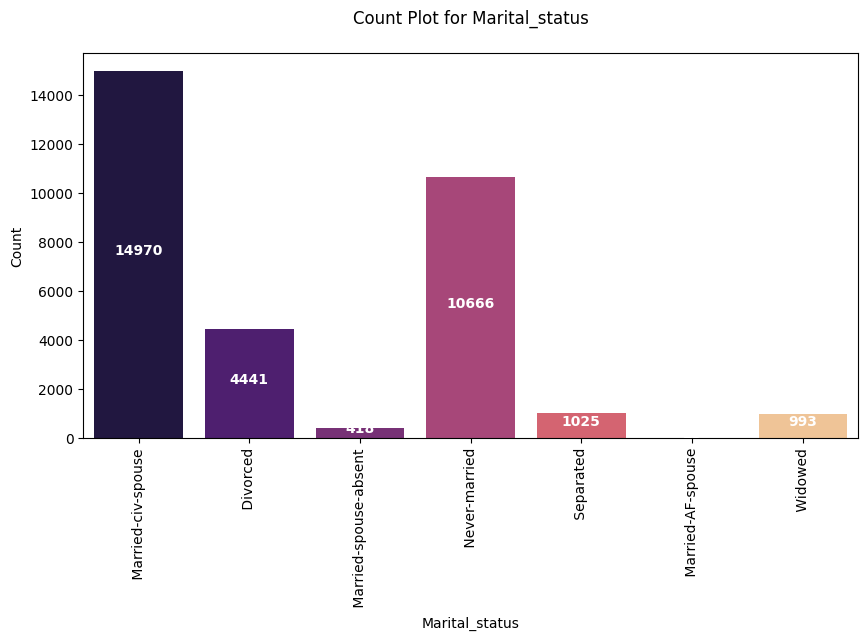

In [23]:
    plt.figure(figsize=(10,5))
    col_name = 'Marital_status'
    values = df[col_name].value_counts()
    index = 0
    ax = sns.countplot(df[col_name], palette="magma")

    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
                horizontalalignment="center", fontweight='bold', color='w')
        index += 1
    
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

- Marital Status column has married spouse and never married people on the higher edge as compared to the other

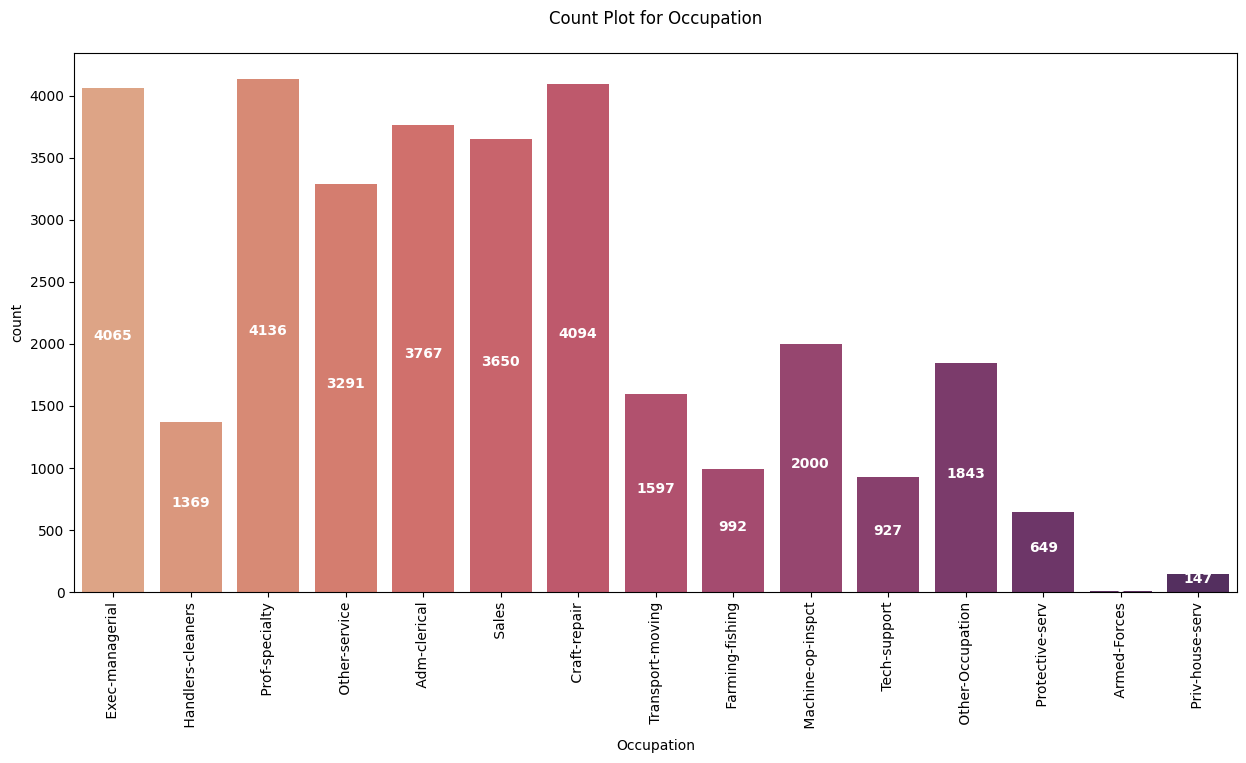

In [24]:
plt.figure(figsize=(15,7))
col_name = 'Occupation'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="flare")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

- People working in Armed Forces are the least and folks engaged in some craft repair, executive managers and holding some professional speciality are increasing.

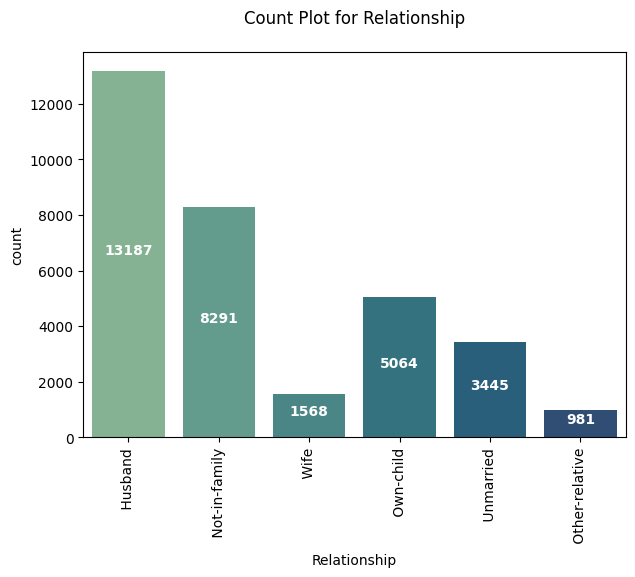

In [25]:
plt.figure(figsize=(7,5))
col_name = 'Relationship'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="crest")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

- "Relationship" status the values for husband is the highest and other relative has the lowest data.

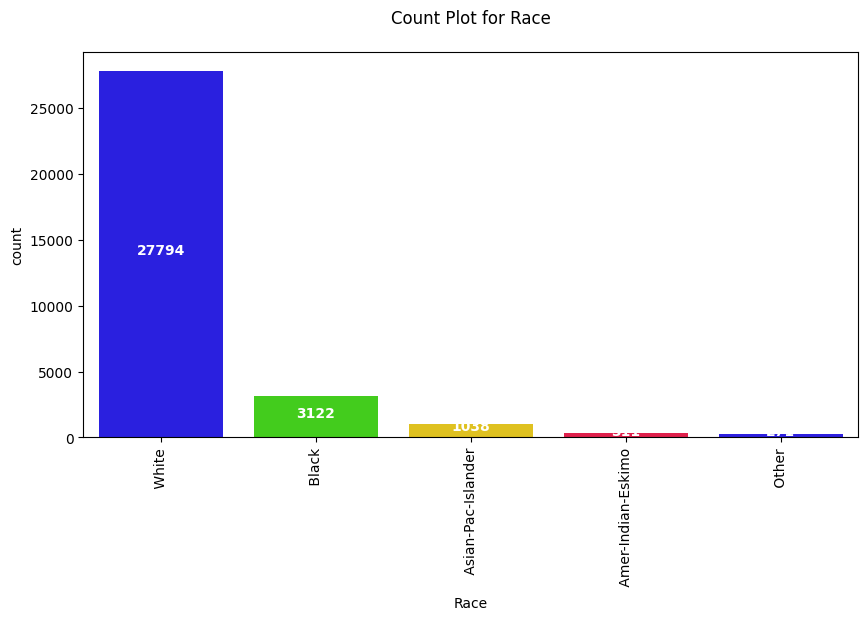

In [26]:
plt.figure(figsize=(10,5))
col_name = 'Race'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

- The Number of White people are the highest and others are almost negligible comapred to White race.

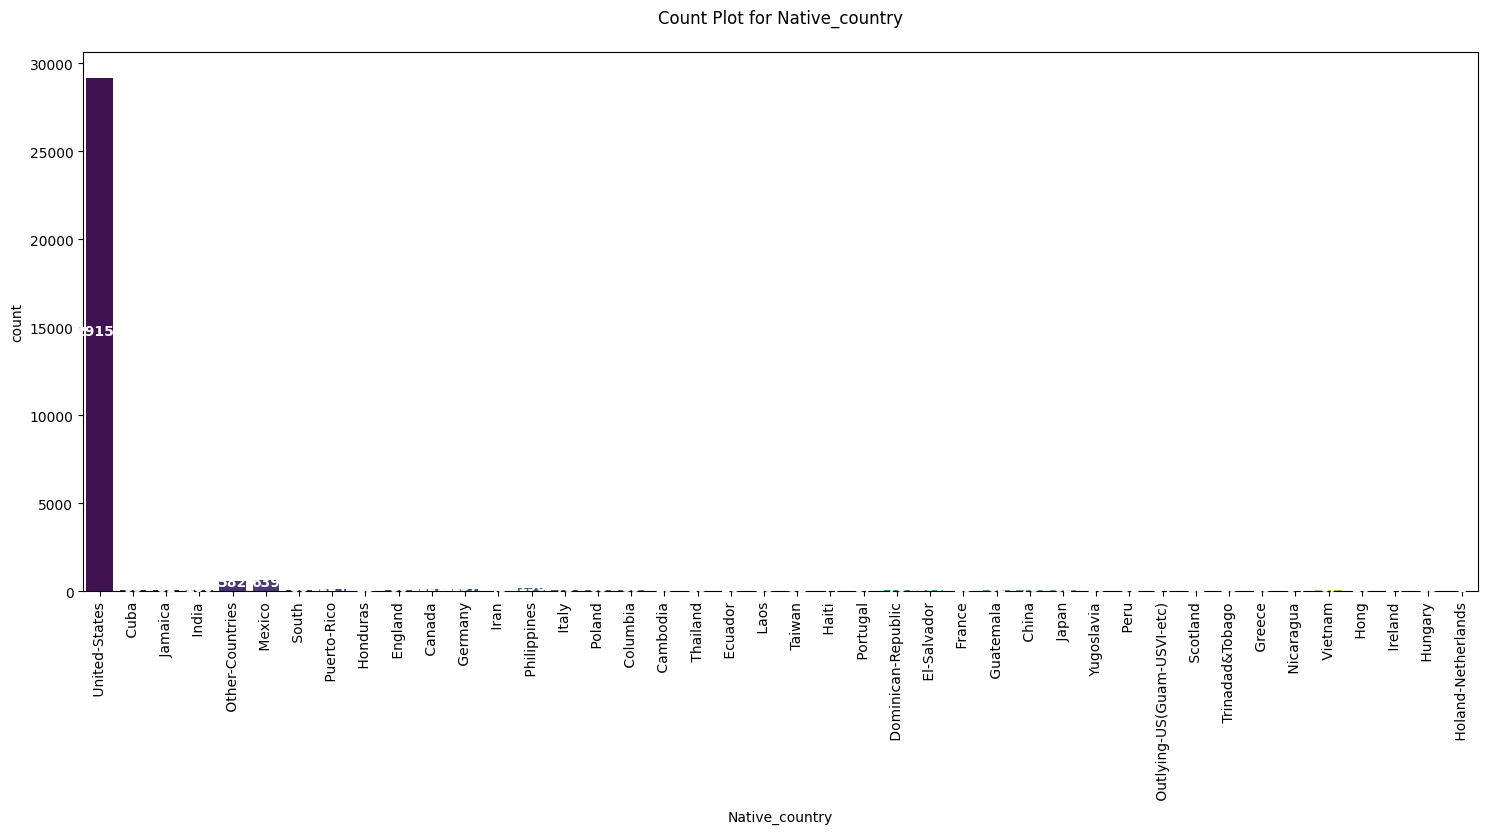

In [27]:
plt.figure(figsize=(18,7))
col_name = 'Native_country'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="viridis")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

- Native Country column has the highest value for US followed by Mexico and Others while the remaining categories has the least to neligible.

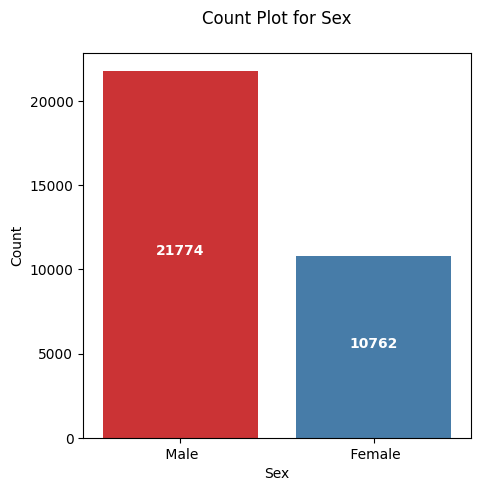

In [28]:
plt.figure(figsize=(5,5))
col_name = 'Sex'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="Set1")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1

plt.title(f"Count Plot for {col_name}\n")
plt.ylabel('Count')
plt.show()

- The Number of ratio of Male is Higher than Females in the 'Sex' column

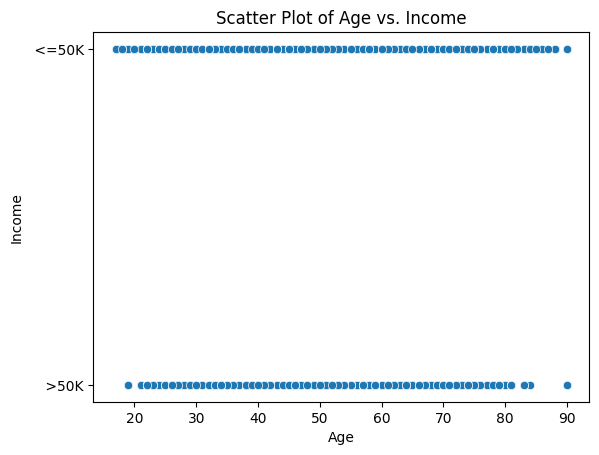

In [29]:
sns.scatterplot(data=df, x='Age', y='Income')
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

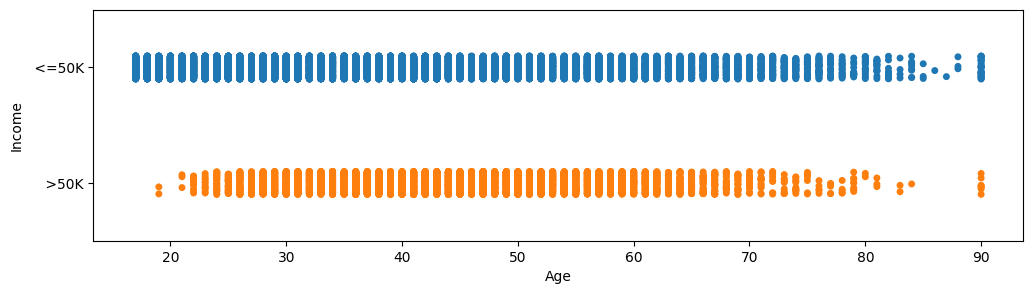

In [30]:
plt.figure(figsize=(12,3))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

- The Young Generation till 20 have hardly income above 50k

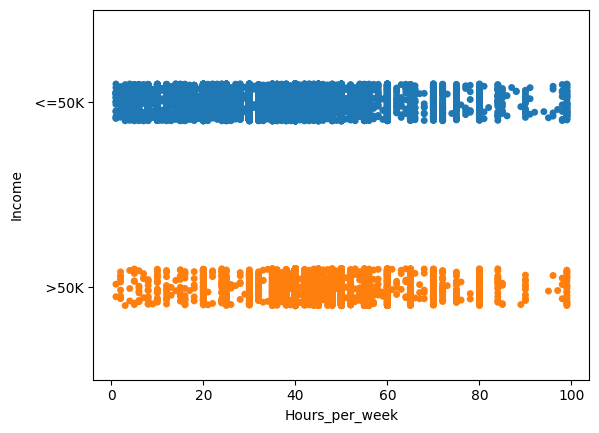

In [31]:
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

- People who have income less than or equal to 50K work for more hours per week as compared to the who earn more than 50K.

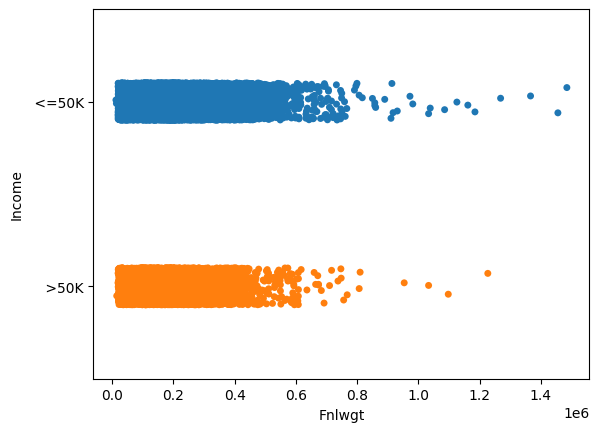

In [32]:
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()


- 'Final weight' has more data points on a higher scale for people in the <=50K income as compared to the people in >50K income 

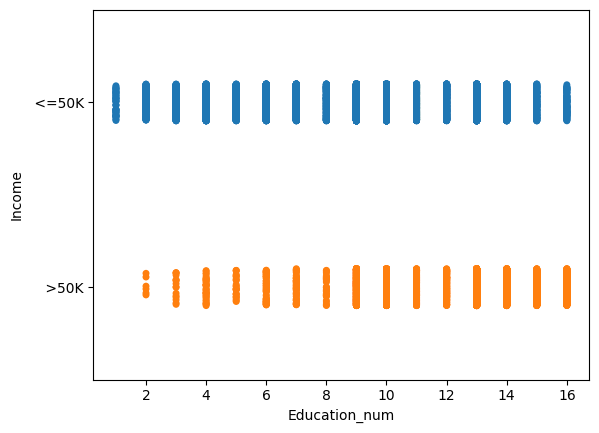

In [33]:
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

- Lower incomce for uneducated is almost Negligible

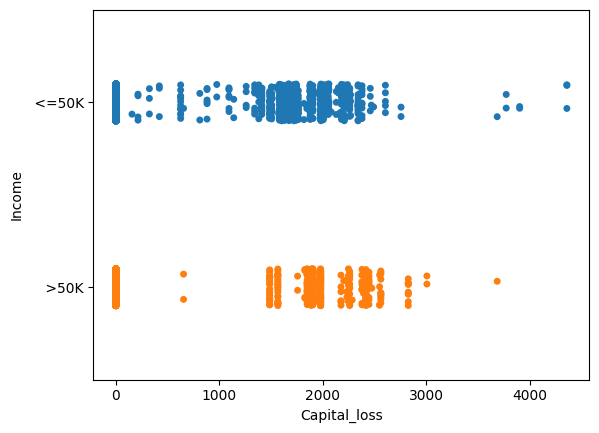

In [34]:
sns.stripplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

-  Capital loss for people with income >50K is very less than people with income <=50K

Text(0, 0.5, 'Percentage of People')

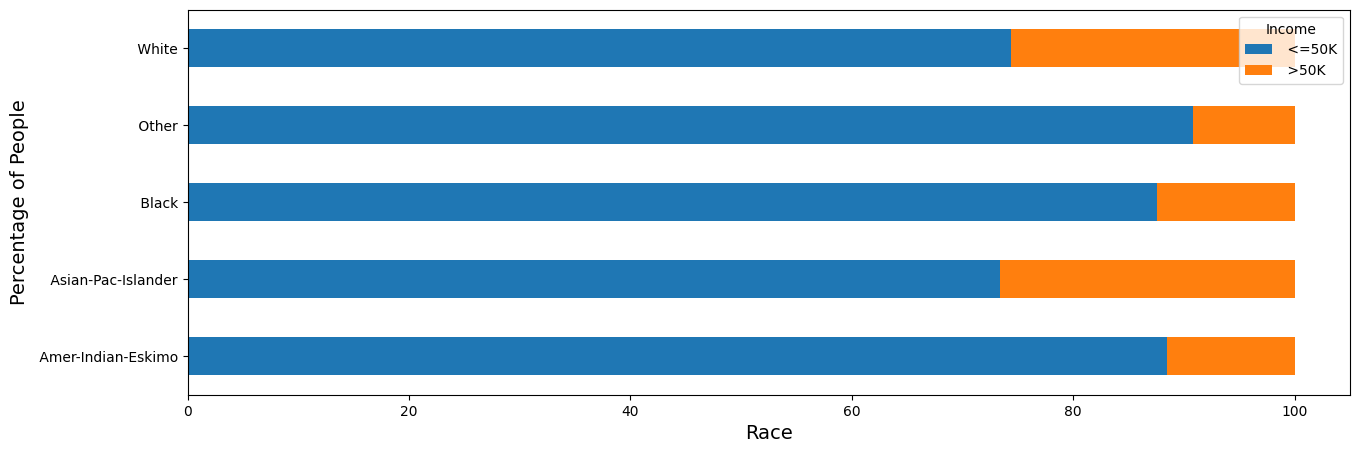

In [35]:
tbl = pd.crosstab(df['Race'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Race', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'People')

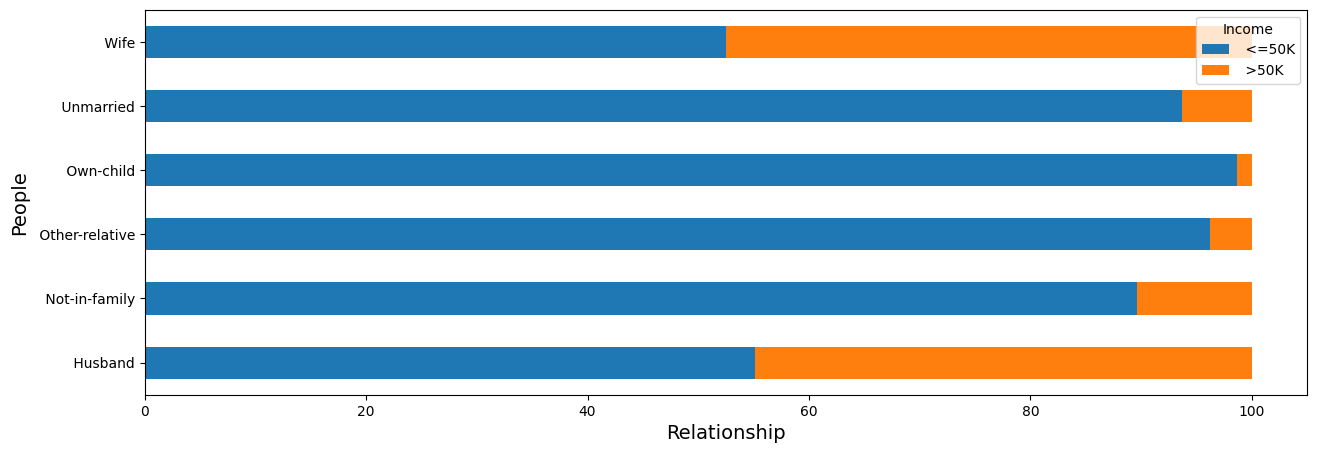

In [36]:
tbl = pd.crosstab(df['Relationship'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Relationship', fontsize=14)
plt.ylabel('People', fontsize=14)

- People who are earning >50K are mostly married.

Text(0, 0.5, 'People')

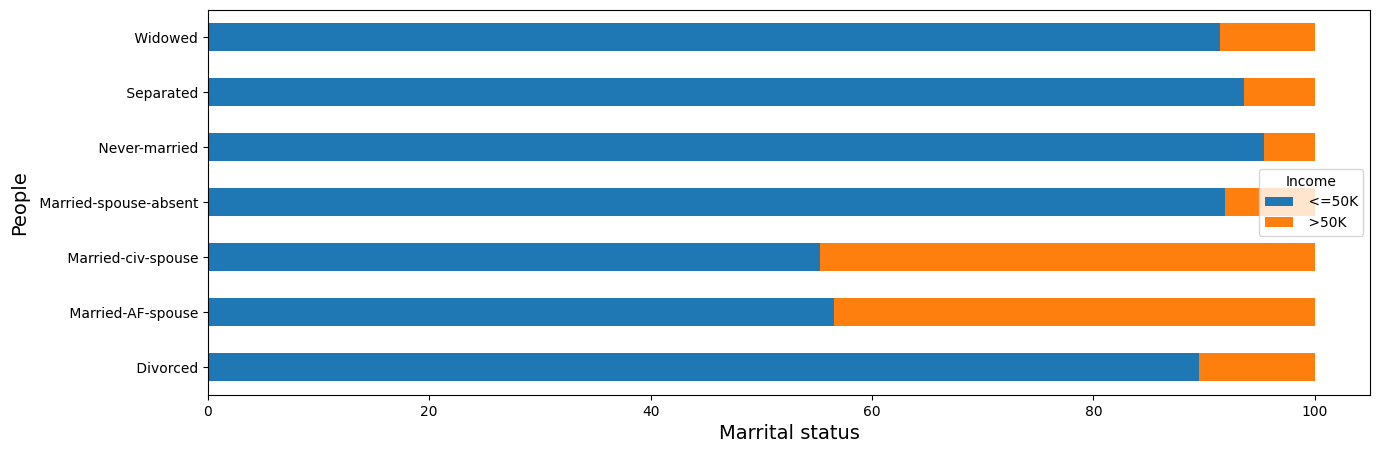

In [37]:
tbl = pd.crosstab(df['Marital_status'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Marrital status', fontsize=14)
plt.ylabel('People', fontsize=14)

Text(0, 0.5, 'People')

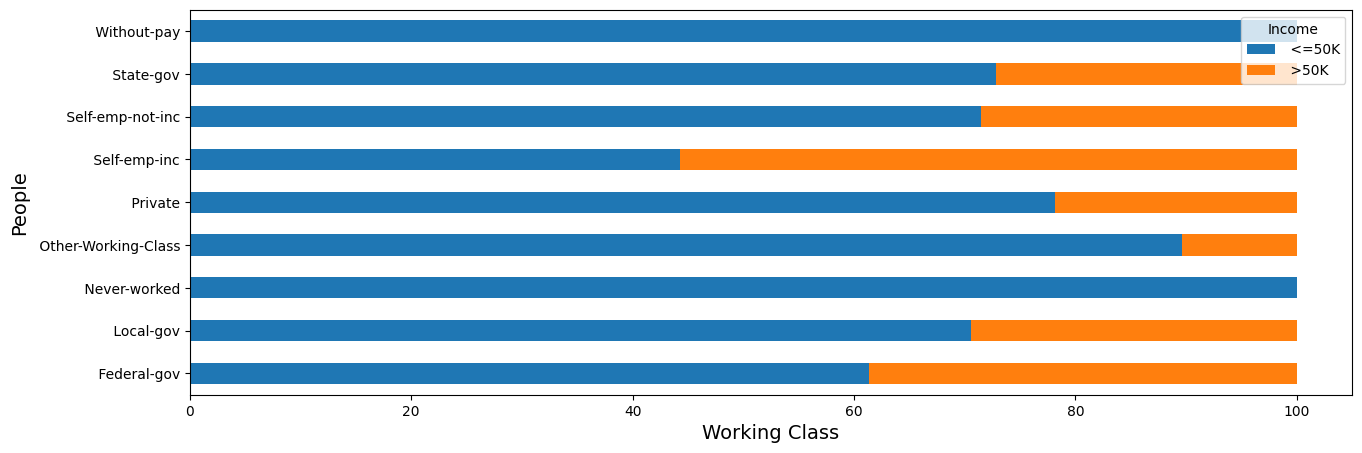

In [38]:
tbl = pd.crosstab(df['Workclass'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Working Class', fontsize=14)
plt.ylabel('People', fontsize=14)

- people who are unemployed come under <=50K income bracket while mostly people who are self employed have an income of >50K.

Text(0, 0.5, 'People')

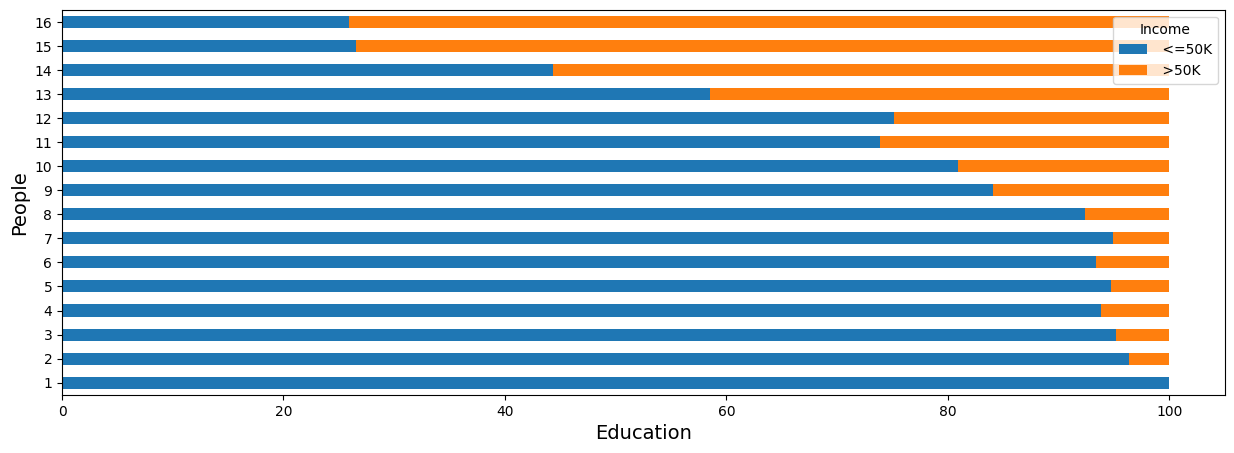

In [39]:
tbl = pd.crosstab(df['Education_num'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Education', fontsize=14)
plt.ylabel('People', fontsize=14)

- People with higher education have higher chances of having income above 50k

Text(0, 0.5, 'Percentage of People')

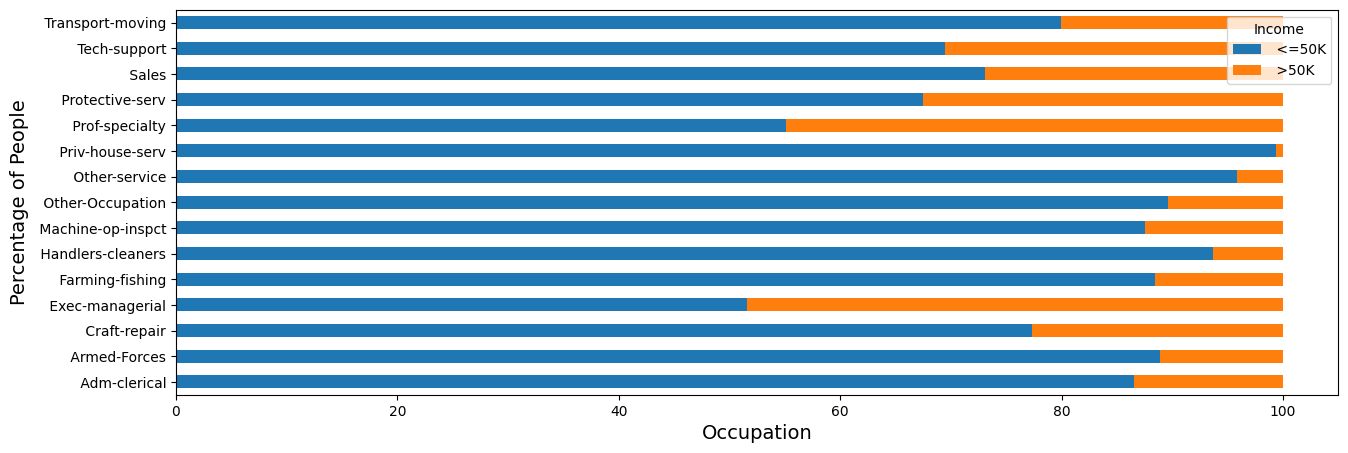

In [40]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='barh',stacked=True,figsize=(15,5))
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Text(0, 0.5, 'Percentage of People')

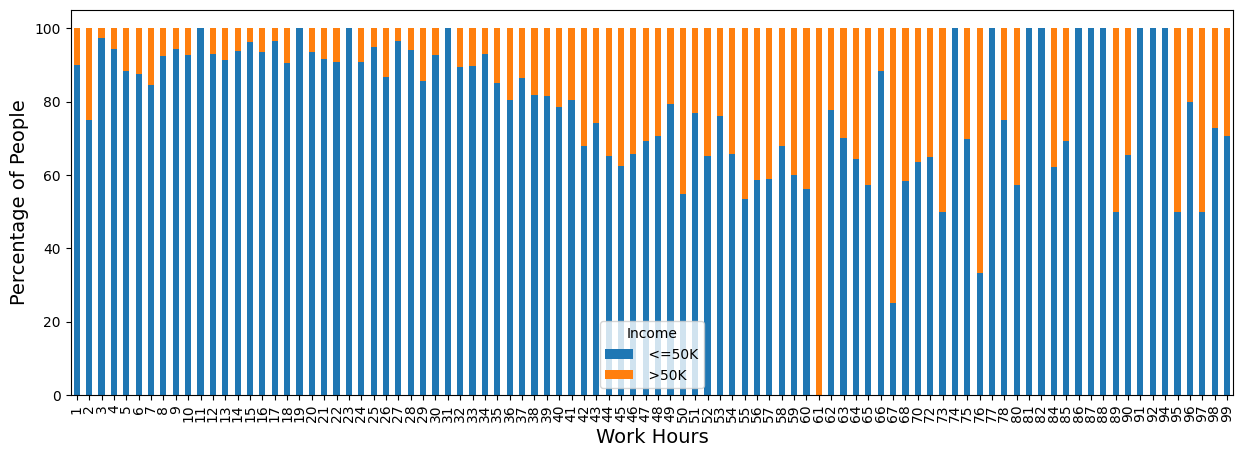

In [41]:
tbl = pd.crosstab(df['Hours_per_week'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Work Hours', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

-  People with >50K income mostly work 61 hours per week or range from 50-80 hours per week mostly.

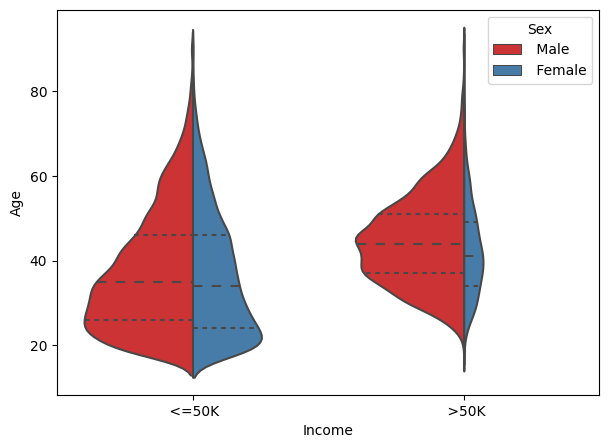

In [42]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

- Male have higher income than feamles 

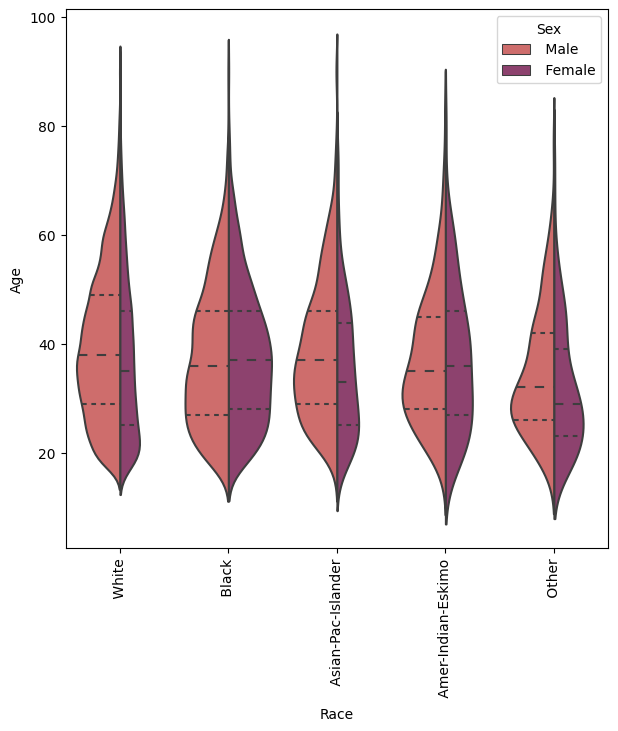

In [43]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="flare", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()


- Female with black race of any age group is higher than the other race females.

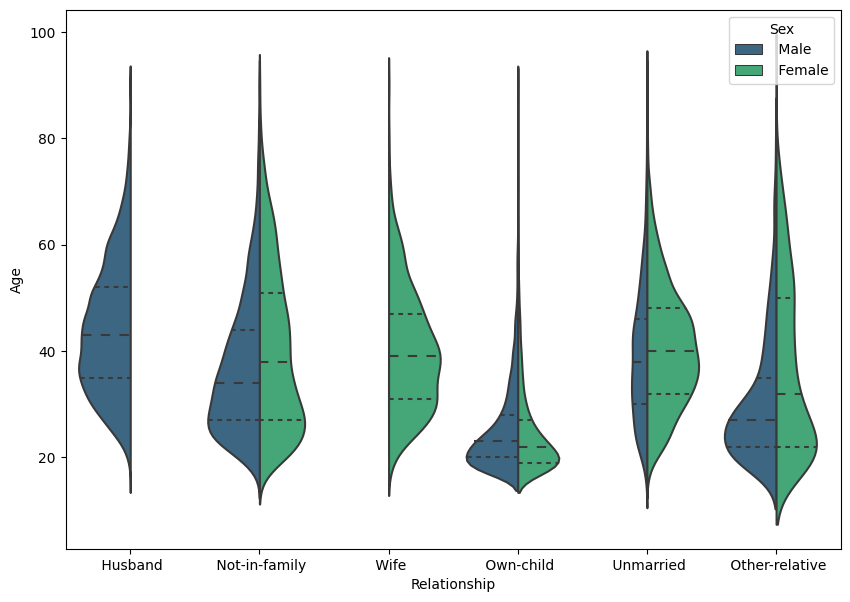

In [44]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="viridis", split=True, scale="count", inner="quartile")
plt.show()

- People with there own child are till 40 and there seem to be more unmarried females than males.

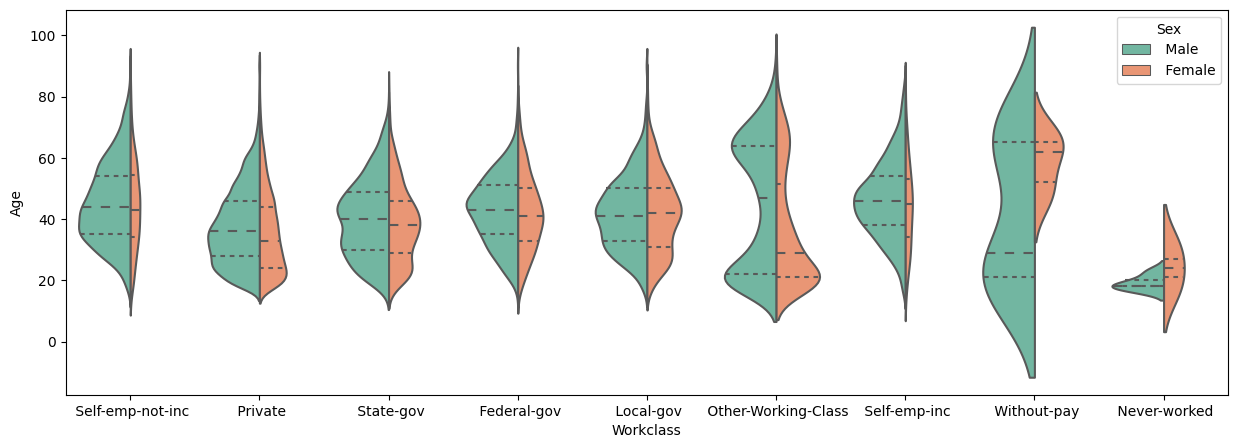

In [45]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

- Male have high numbers in all working class than females.

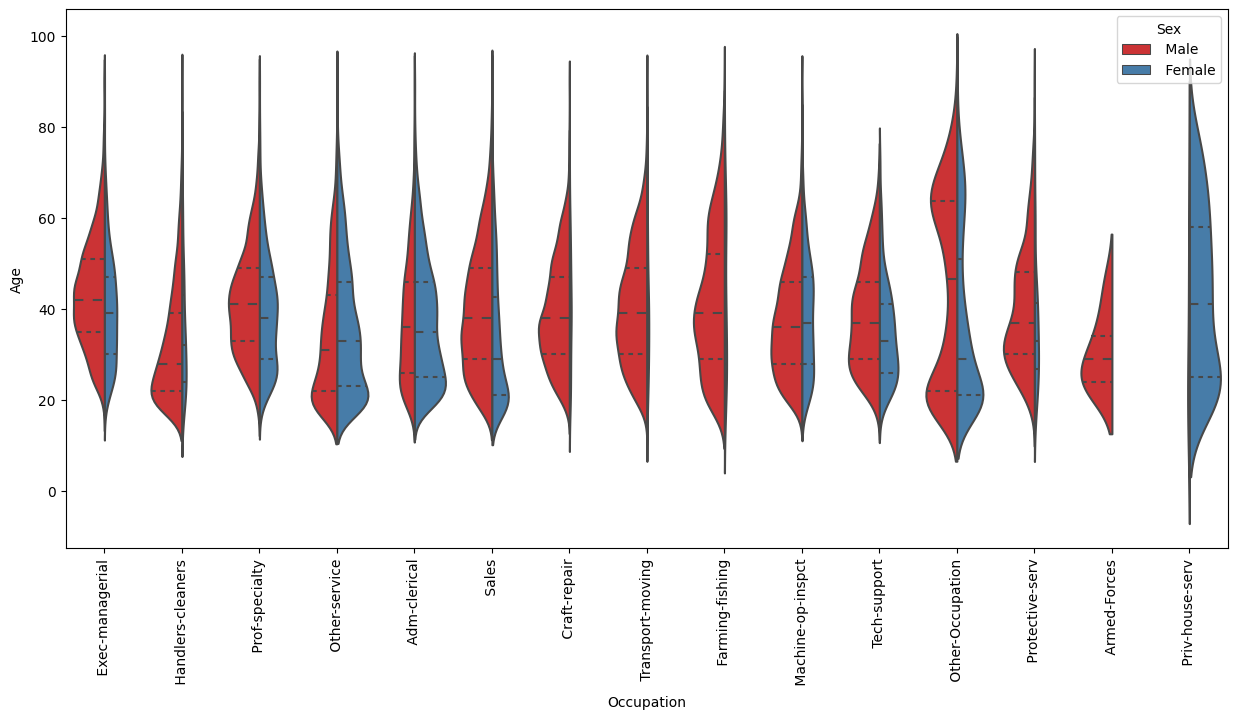

In [46]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

- Private house services has more females mostly from the 20-60 age group while occupations such as craft repair, transport moving, farming/fishing, protective/security service and armed forces have a larger number for males.

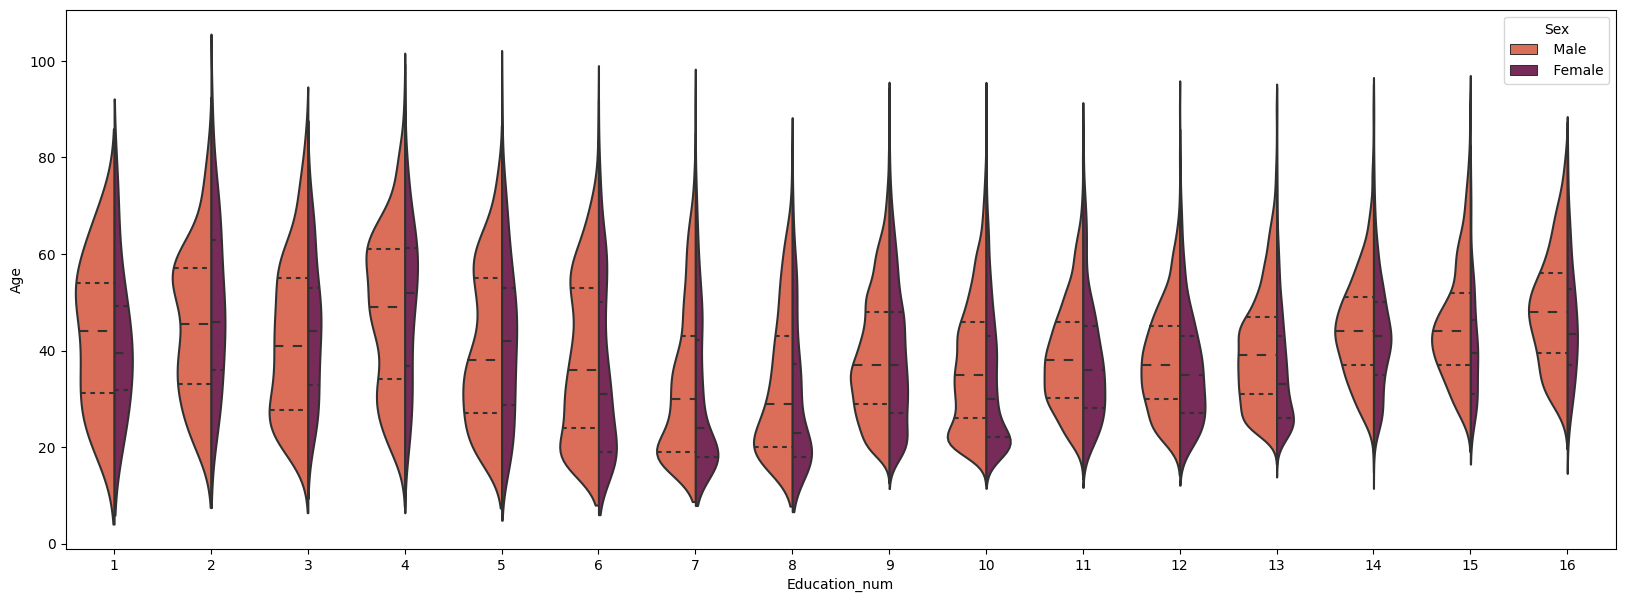

In [47]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="rocket_r", split=True, scale="count", inner="quartile")
plt.show()


- Males have higher education than famales

#### -We will proceed to Encoding the Categorical Variables

In [48]:
## Importing Libraries for Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

le = LabelEncoder()
df["Income"] = le.fit_transform(df["Income"])
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States       0  
1             0             0              40   United-States       0  
2             0             0              40   United-States       0  
3             0             0              40            Cuba       0  
4             0             0              40   United-States       0

In [49]:
Encoder = OrdinalEncoder()
df['Workclass'] = Encoder.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education'] = Encoder.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status'] = Encoder.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation'] = Encoder.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship'] = Encoder.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Native_country'] = Encoder.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Race'] = Encoder.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex'] = Encoder.fit_transform(df['Sex'].values.reshape(-1,1))
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50        6.0   83311        9.0             13             2.0   
1   38        4.0  215646       11.0              9             0.0   
2   53        4.0  234721        1.0              7             2.0   
3   28        4.0  338409        9.0             13             2.0   
4   37        4.0  284582       12.0             14             2.0   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0         3.0           0.0   4.0  1.0             0             0   
1         5.0           1.0   4.0  1.0             0             0   
2         5.0           0.0   2.0  1.0             0             0   
3        10.0           5.0   2.0  0.0             0             0   
4         3.0           5.0   4.0  0.0             0             0   

   Hours_per_week  Native_country  Income  
0              13            39.0       0  
1              40            39.0       0  
2              40            39.0       0  
3              40             4.0       0  
4              40            39.0       0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32536 non-null  int64  
 1   Workclass       32536 non-null  float64
 2   Fnlwgt          32536 non-null  int64  
 3   Education       32536 non-null  float64
 4   Education_num   32536 non-null  int64  
 5   Marital_status  32536 non-null  float64
 6   Occupation      32536 non-null  float64
 7   Relationship    32536 non-null  float64
 8   Race            32536 non-null  float64
 9   Sex             32536 non-null  float64
 10  Capital_gain    32536 non-null  int64  
 11  Capital_loss    32536 non-null  int64  
 12  Hours_per_week  32536 non-null  int64  
 13  Native_country  32536 non-null  float64
 14  Income          32536 non-null  int32  
dtypes: float64(8), int32(1), int64(6)
memory usage: 3.8 MB


- We have succesfully encoded all the Categorical features

### Outlier Detection

- We will use Boxplot to check if there are any outliers in the Dataset

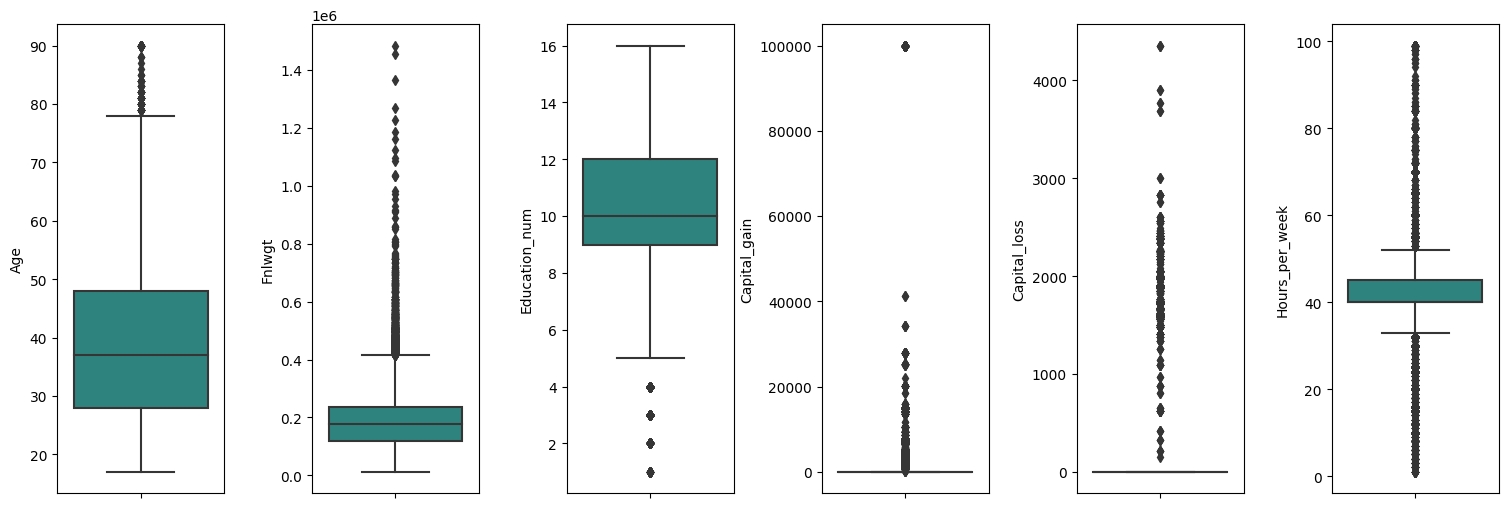

In [51]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- All the Numerical Features have Outliers in them which will need to be treated before Model Building

### Skewness

- We will check the Skewness of the Numerical Feature by seeing the kde curve

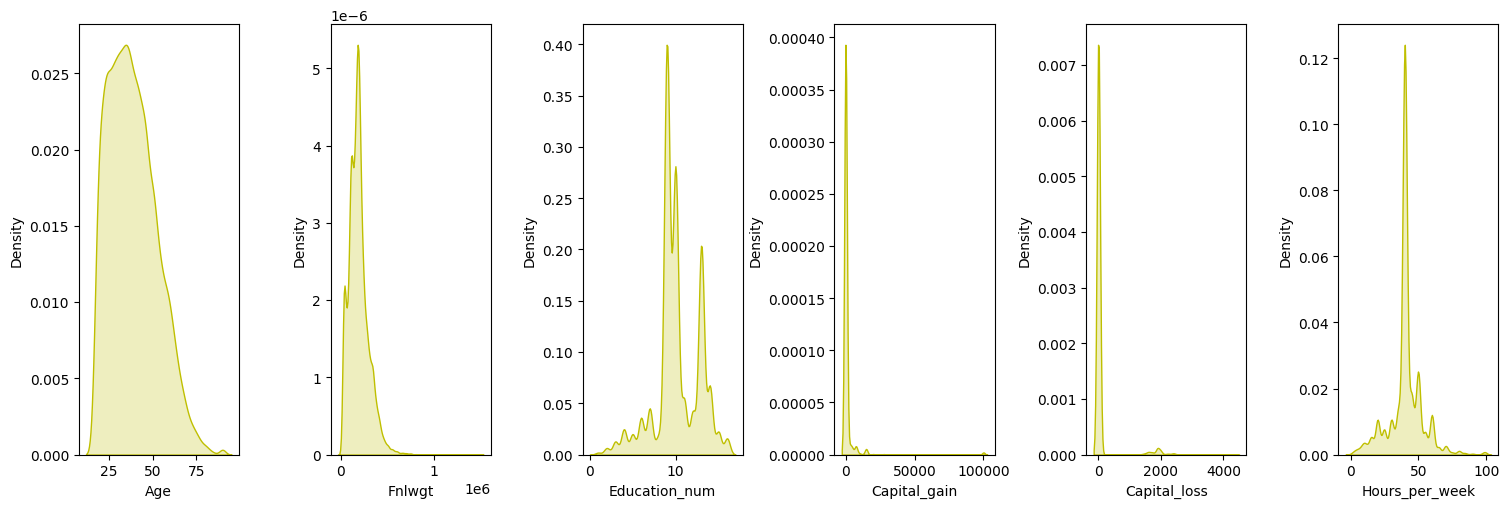

In [52]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[Numericals_features].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- There are Skewness present in the column which needs to be treated

#### Pairplot

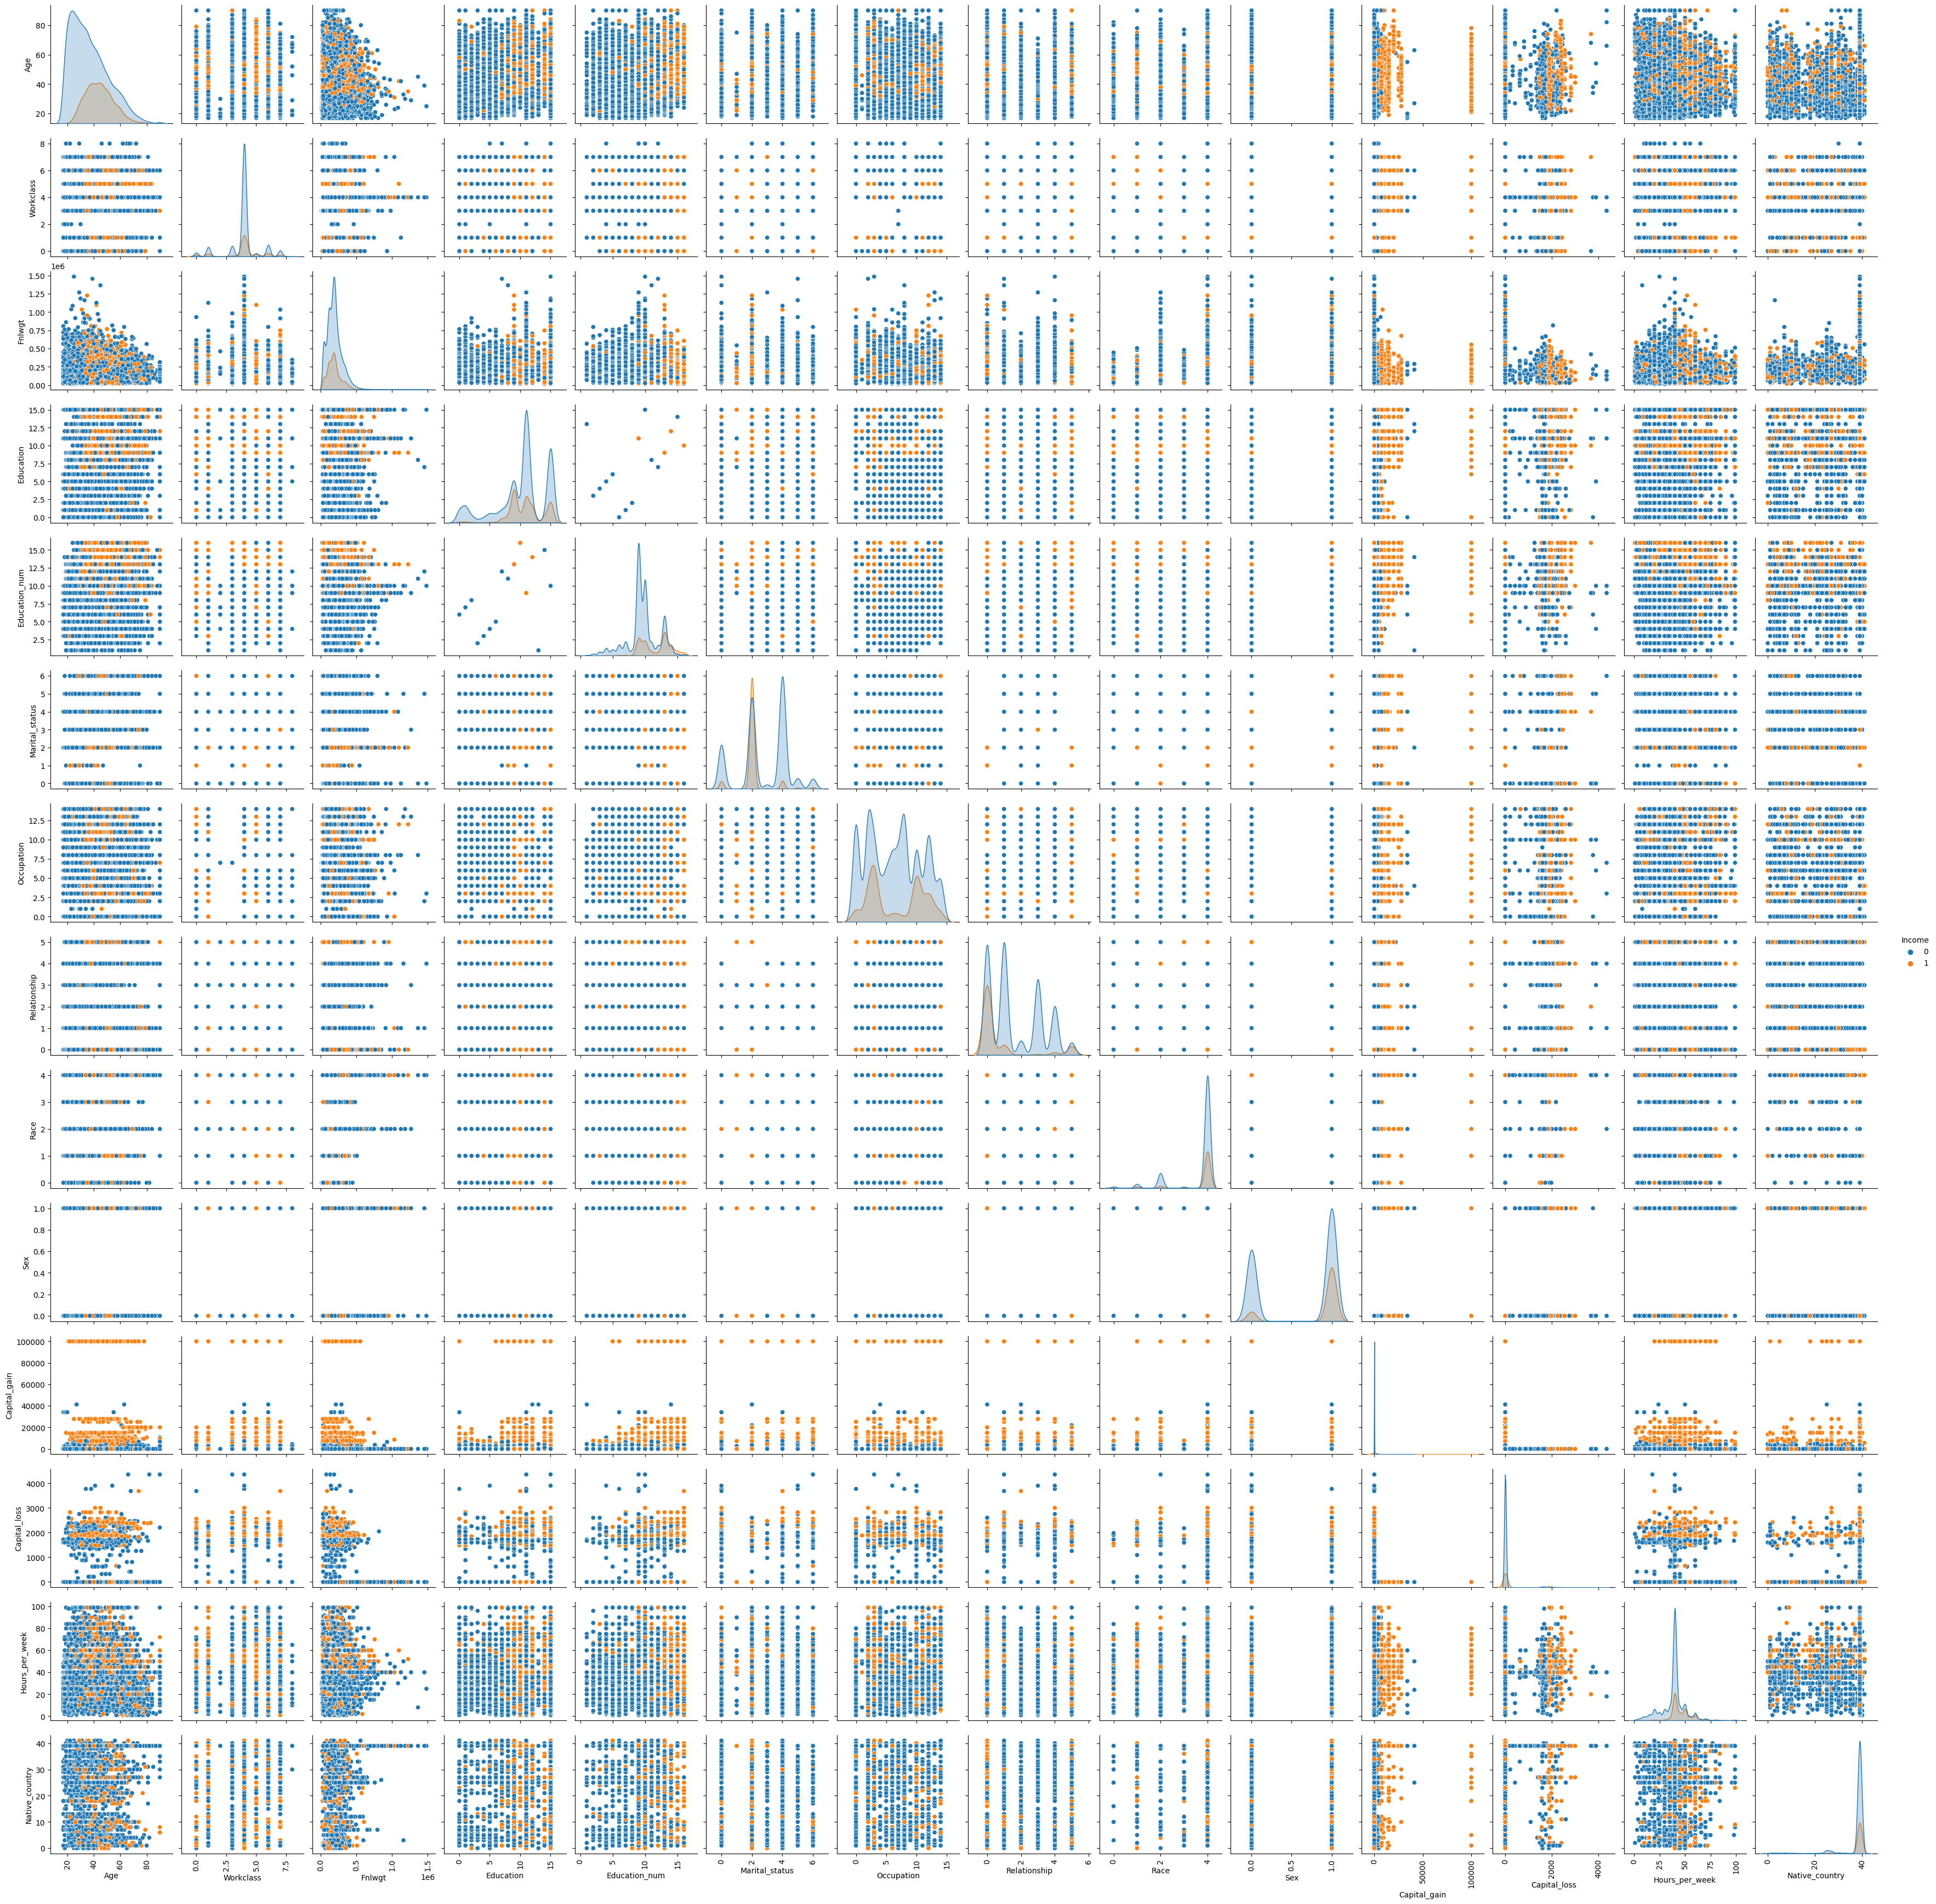

In [53]:
plt.style.use('default')
g = sns.pairplot(df, hue='Income', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

- Lets see the Ditribution of the features

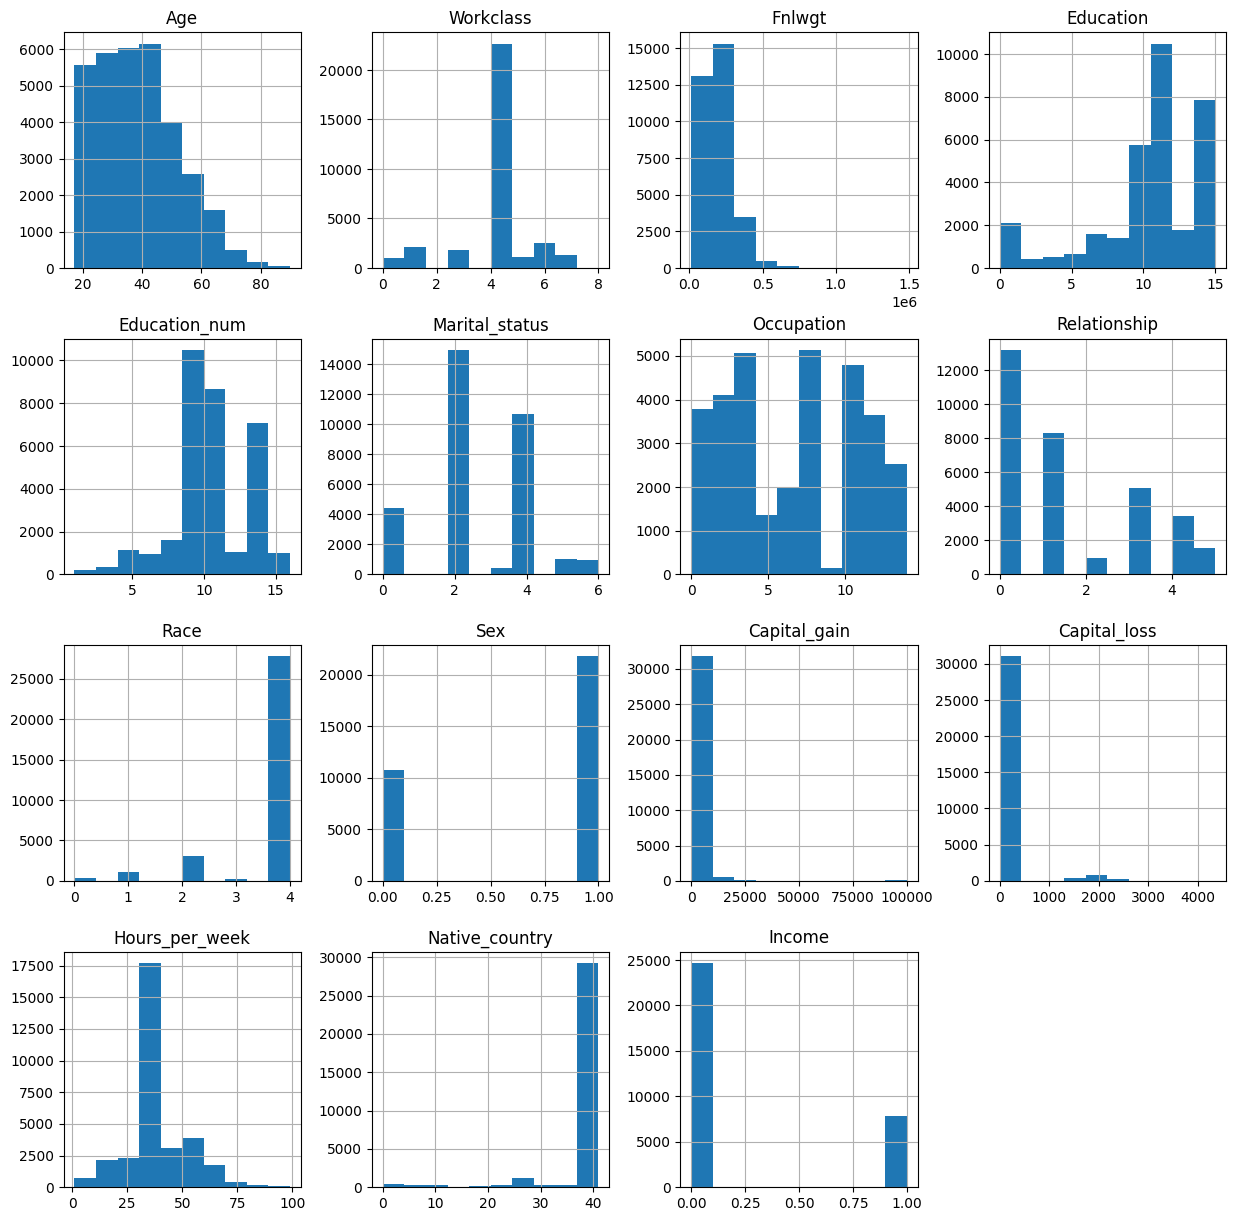

In [54]:
df.hist(figsize=(15,15))
plt.show()

### Correlation

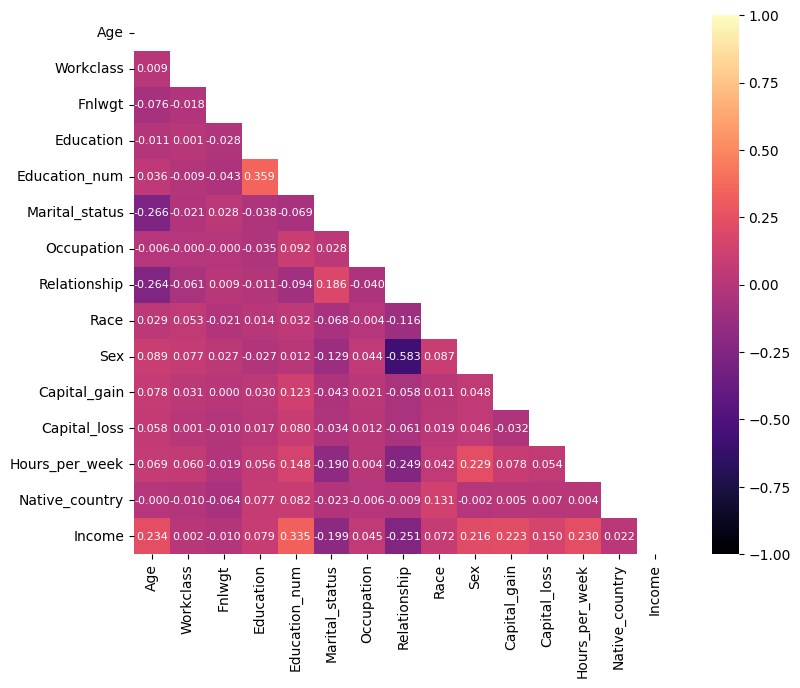

In [55]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- We are not able to perfectly Derive an observation from the heatmap, lets try with a Bar plot

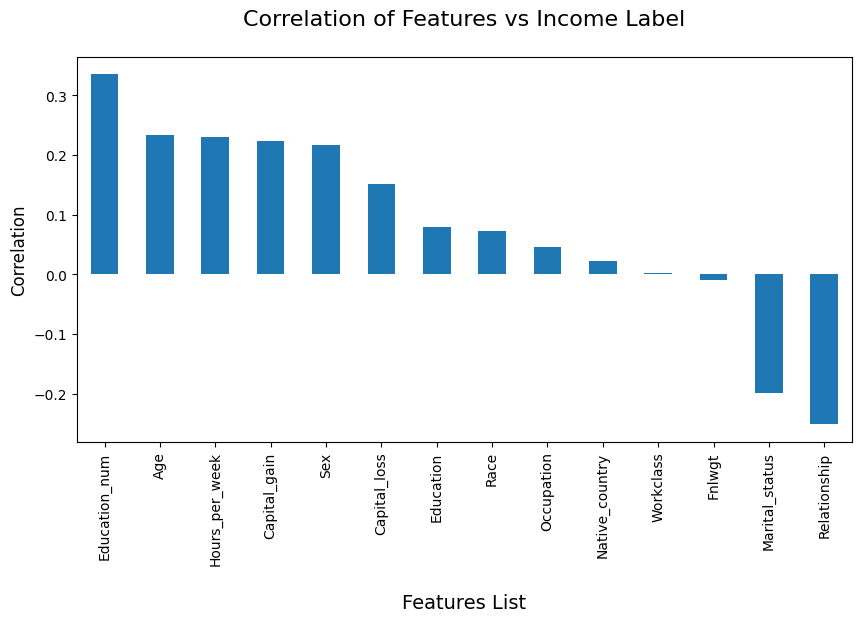

In [56]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation", fontsize=12)
plt.show()

- The features 'Education_num','Age','Hours','Capital_gain'...are positively correlated to output feature
- The features Marital_status,'relationship' are Negatively Correlated

#### Handling the Outliers

In [57]:
from scipy.stats import zscore
## Lets assume the Threshold to be where data points which have higher Z-score than 3 will be treated as Outliers
threshold = 3
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]

## Calculating the Paramters to get the idea about the Data Loss
print ("Dataframe shape before removing outliers: ", df.shape)
print ("Dataframe shape after removing outliers: ", df_new.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Dataframe shape before removing outliers:  (32536, 15)
Dataframe shape after removing outliers:  (27763, 15)
Percentage of data loss after outlier removal:  14.669904106220802


- The Data Loss is 14% which is high but since we have almost 30k data points, this amount of Data Loss is Acceptable

In [58]:
df=df_new.copy()

#### Handling Skewness

In [59]:
df.skew()

Age                0.484855
Workclass         -0.663507
Fnlwgt             0.629184
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.101481
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       4.929937
Capital_loss      29.510814
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

In [60]:
for col in Numericals_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [61]:
df.skew()

Age                0.484855
Workclass         -0.663507
Fnlwgt            -0.955984
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.101481
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       3.111123
Capital_loss      25.003969
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

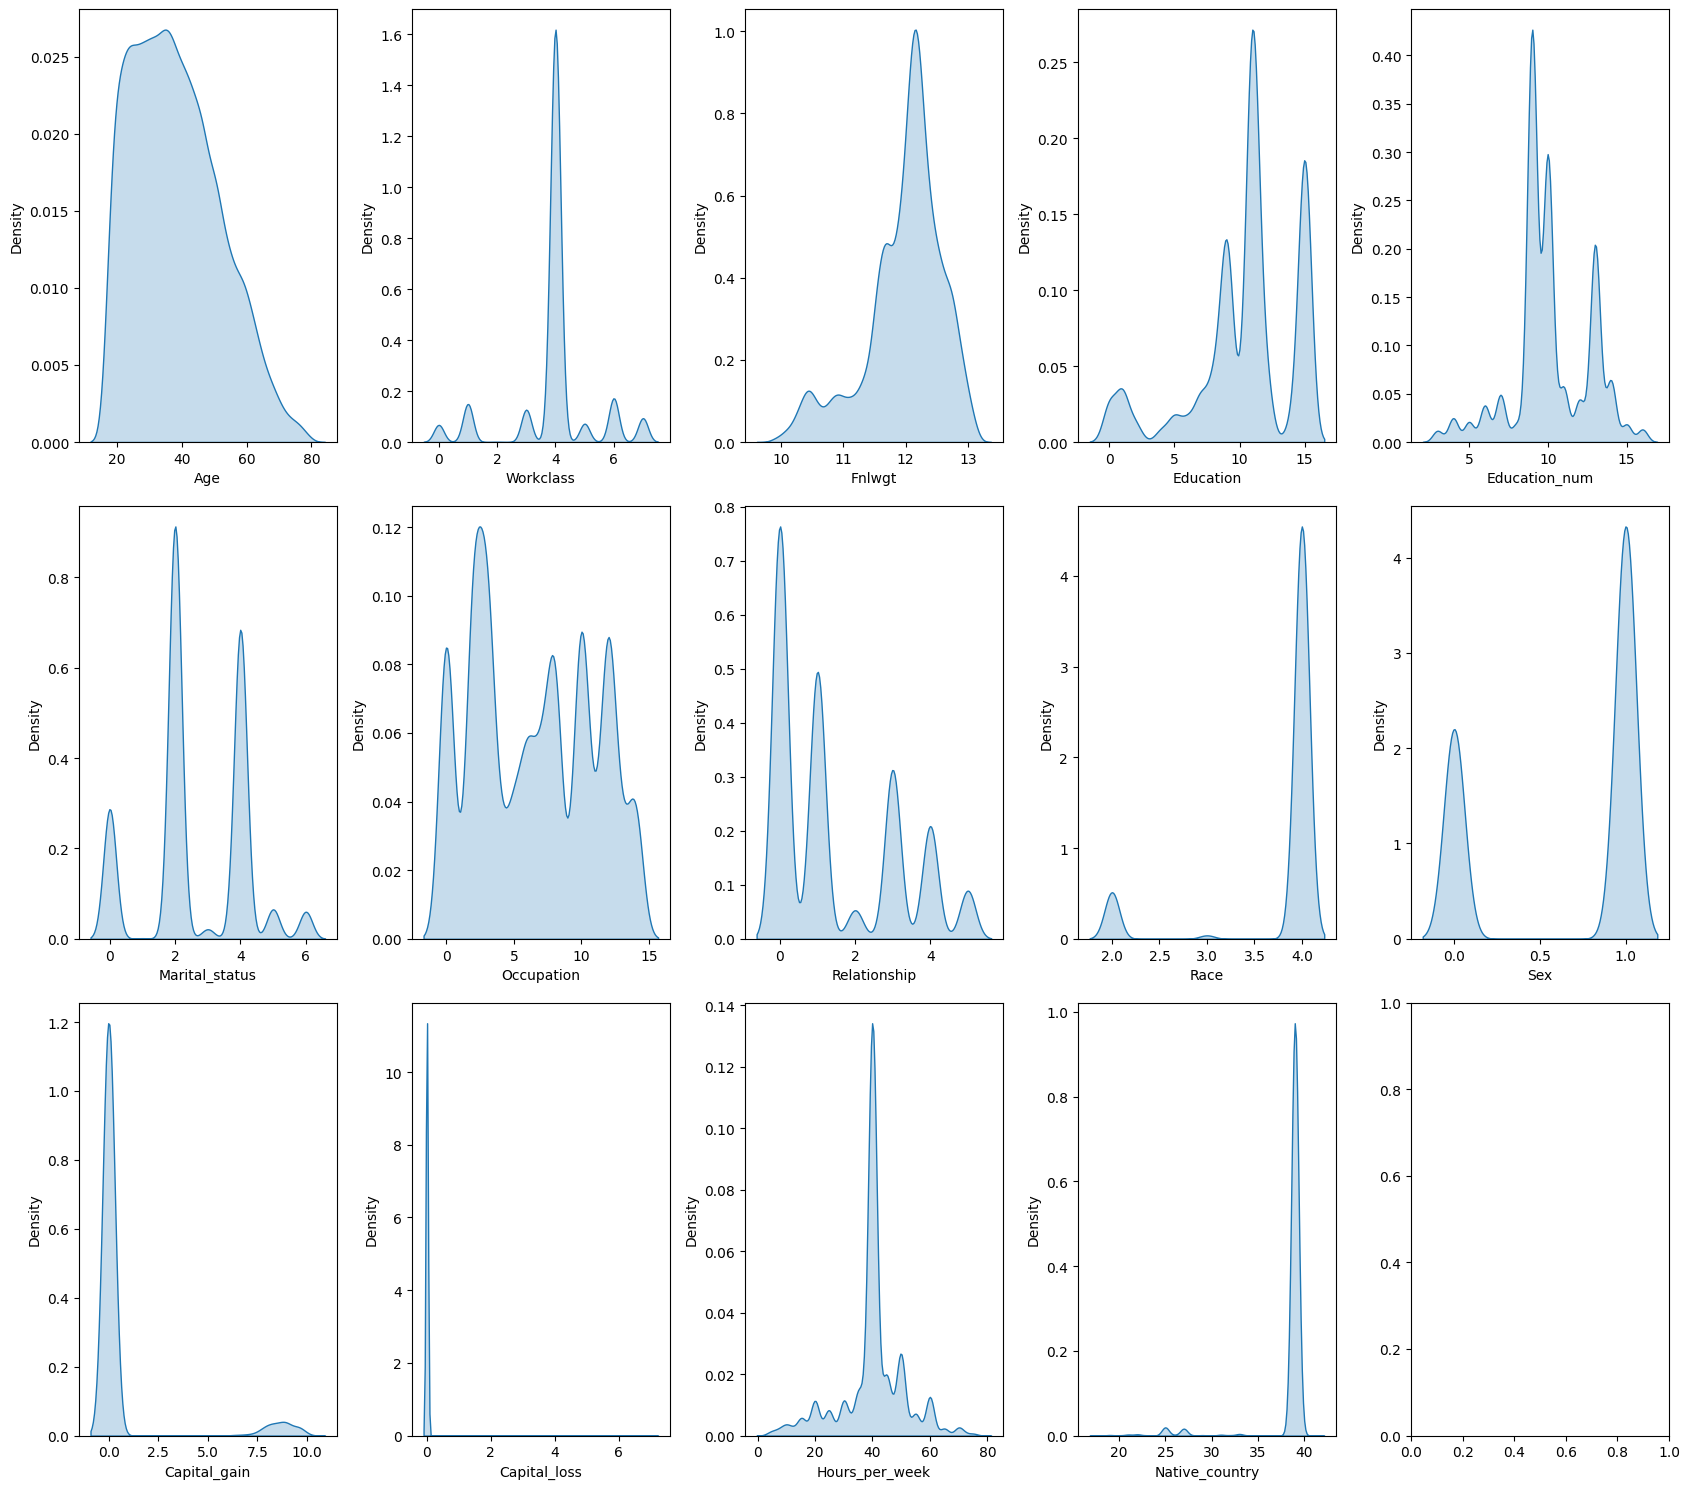

In [62]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Income", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout()
plt.show()

### Splitting the Dataset into two (i.e Indpendent(X) and Dependent(y) features)

In [63]:
X = df.drop('Income', axis=1)
y = df['Income']

In [64]:
y.value_counts()

0    21535
1     6228
Name: Income, dtype: int64

- The Dataset is Highly Imbalanced so we do oversampling to Balance the Dataset

In [65]:
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [66]:
y.value_counts()

0    21535
1    21535
Name: Income, dtype: int64

- The dataset is now perfectly Balanced

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0  0.781478   1.548044 -1.135881  -0.429914       1.014025       -0.316356   
1 -0.170432   0.051026  0.528520   0.139899      -0.633415       -1.851480   
2  1.019455   0.051026  0.676854  -2.709165      -1.457135       -0.316356   
3 -0.249757   0.051026  1.013958   0.424806       1.425885       -0.316356   
4  0.702152   0.051026  0.008235  -1.284633      -2.280855        0.451205   

   Occupation  Relationship      Race       Sex  Capital_gain  Capital_loss  \
0   -0.811826     -0.728452  0.310179  0.606647      -0.38354     -0.032904   
1   -0.354104     -0.104593  0.310179  0.606647      -0.38354     -0.032904   
2   -0.354104     -0.728452 -3.473627  0.606647      -0.38354     -0.032904   
3   -0.811826      2.390840  0.310179 -1.695491      -0.38354     -0.032904   
4    0.332480     -0.104593 -3.473627 -1.695491      -0.38354     -0.032904   

   Hours_per_week  Native_country  
0       -2.657098        0.210510  
1       -0.150291        0.210510  
2       -0.150291        0.210510  
3       -0.150291        0.210510  
4       -2.378564       -5.843728

In [68]:
## Importing ML Algortihms and Performance Metrics , GridSearch and Cross Validation for Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Train Test Split and Finding the best random state for the models

In [69]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc_score = (accuracy_score(y_test, y_pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"for Random State", maxRS)

Best accuracy score is 78.05897376364058 for Random State 724


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=724)

- We will make a function to train test split in dependent and indepedent features and then train the model while predicting the 'Income'
- The function will Calculate accuracy score, generating the classification report, the Cross-Validation score and in the end it will Calculate the Difference between the accuracy score and cross validation score.

In [80]:
def Income(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=724)    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    y_pred = model.predict(X_test)
    
    # Accuracy Score
    accuracy = (accuracy_score(y_test, y_pred))*100
    print("Accuracy Score:", accuracy)
    
    # Classification Report
    Report = classification_report(y_test, y_pred)
    print("\nClassification Report:\n", Report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

#### Logistic Regression

In [81]:
model = LogisticRegression()
Income(model, X, y)

Accuracy Score: 77.99962852897474

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      5299
           1       0.77      0.81      0.79      5469

    accuracy                           0.78     10768
   macro avg       0.78      0.78      0.78     10768
weighted avg       0.78      0.78      0.78     10768

Cross Validation Score: 76.77733921523102

Accuracy Score - Cross Validation Score is 0.6779661016949206


#### Support Vector Classifier

In [82]:
model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=765)
Income(model, X, y)

Accuracy Score: 84.45393759286776

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      5299
           1       0.81      0.91      0.86      5469

    accuracy                           0.84     10768
   macro avg       0.85      0.84      0.84     10768
weighted avg       0.85      0.84      0.84     10768

Cross Validation Score: 84.07244021360576

Accuracy Score - Cross Validation Score is -6.617134896679815


#### Decision Tree Classifier

In [84]:
model = DecisionTreeClassifier()
Income(model, X, y)

Accuracy Score: 85.35475482912332

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      5299
           1       0.85      0.86      0.86      5469

    accuracy                           0.85     10768
   macro avg       0.85      0.85      0.85     10768
weighted avg       0.85      0.85      0.85     10768

Cross Validation Score: 85.76735546784305

Accuracy Score - Cross Validation Score is -8.312050150917102


#### Random Forest Classifier

In [85]:
model = RandomForestClassifier()
Income(model, X, y)

Accuracy Score: 89.62667161961367

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89      5299
           1       0.89      0.90      0.90      5469

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Cross Validation Score: 89.71209658695149

Accuracy Score - Cross Validation Score is -12.256791270025545


#### K Neighbors Classifier

In [86]:
model=KNeighborsClassifier(n_neighbors=15)
Income(model, X, y)

Accuracy Score: 83.84101040118871

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      5299
           1       0.80      0.90      0.85      5469

    accuracy                           0.84     10768
   macro avg       0.84      0.84      0.84     10768
weighted avg       0.84      0.84      0.84     10768

Cross Validation Score: 83.68005572324122

Accuracy Score - Cross Validation Score is -6.22475040631528


#### Extra Trees Classifier

In [87]:
model=ExtraTreesClassifier()
Income(model, X, y)

Accuracy Score: 90.06315007429421

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      5299
           1       0.89      0.92      0.90      5469

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Cross Validation Score: 90.33201764569306

Accuracy Score - Cross Validation Score is -12.876712328767113


#### XGB Classifier

In [88]:
model=xgb.XGBClassifier(verbosity=0)
Income(model, X, y)

Accuracy Score: 89.84026745913819

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      5299
           1       0.89      0.91      0.90      5469

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Cross Validation Score: 88.92732760622243

Accuracy Score - Cross Validation Score is -11.47202228929649


### Hyper parameter tuning

In [89]:
paramters = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'max_depth' : [0, 15, 30, 40, 50],
              'n_estimators' : [100,150,200,250,300,350,400]
             }

In [91]:
Grid_Search = GridSearchCV(ExtraTreesClassifier(), paramters, cv=5)
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30, 40, 50],
                         'n_estimators': [100, 150, 200, 250, 300, 350, 400],
                         'n_jobs': [-2, -1, 1]})

In [92]:
Grid_Search.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 350, 'n_jobs': -2}

In [93]:
Grid_Search.best_score_

0.8990018060011321

#### Final Model

In [94]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=50, n_estimators=350, n_jobs=-2, random_state=724)
Classifier = Final_Model.fit(X_train, y_train)
final_pred = Final_Model.predict(X_test)
final_accuracy = (accuracy_score(y_test, final_pred))*100
print("Accuracy score for the Best Model is:", final_accuracy)

Accuracy score for the Best Model is: 90.45739493847226


### AUC ROC Curve

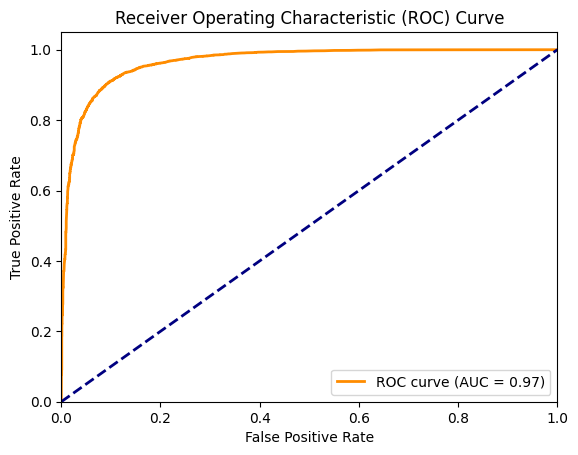

In [95]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for the test set
y_score = Final_Model.predict_proba(X_test)[:, 1]

# calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- The AUC score is 0.97 which is very good so are good to go ahead.

### Confusion Matrix

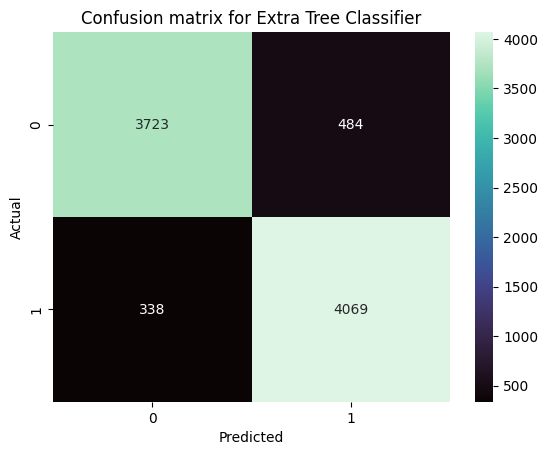

In [98]:
from sklearn.metrics import confusion_matrix

y_pred = Final_Model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', cmap='mako')
plt.title('Confusion matrix for Extra Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the Final model

In [100]:
import joblib
filename = "Census_income.pkl"
joblib.dump(Final_Model, filename)

['Census_income.pkl']